# Audio Data Augmentation Tutorial
## These techniques serve to enable us to combat overfitting when training a model

Work is derived from this research paper that used speed perturbation and tempo perturbation as a mean of augmenting a speech recognition algorithm: https://www.danielpovey.com/files/2015_interspeech_augmentation.pdf

The librosa functionality is derived from this medium article: https://medium.com/@makcedward/data-augmentation-for-audio-76912b01fdf6

Please note that if you run this script it will produce alternative wav files for you to listen to. Code will need adjustments for different filetypes

In [30]:
import matplotlib.pyplot as plt
import librosa
import numpy as np
import scipy
from scipy.io import wavfile
import sox
import colorednoise as cn

## Plotting Baseline Signal Containing Rainforest Audio

In [3]:
AudioClip = "AudiomothSample.wav"
SIGNAL,SAMPLE_RATE = librosa.load(AudioClip,sr=384000)

Text(0.5, 1.0, 'Audiomoth Sample Pure Signal Waveform')

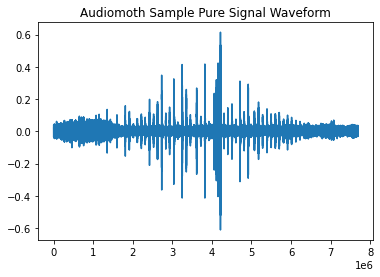

In [4]:
plt.plot(SIGNAL)
plt.title("Audiomoth Sample Pure Signal Waveform")

Text(0.5, 1.0, 'Audiomoth Sample Pure Signal Spectrogram')

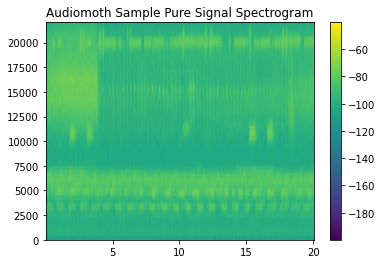

In [5]:
arr = plt.specgram(SIGNAL,Fs = SAMPLE_RATE, NFFT = 1024, noverlap = 512, window = np.hanning(1024))
plt.ylim(0,22050)
plt.colorbar()
plt.title("Audiomoth Sample Pure Signal Spectrogram")

## Pitch Augmentation 

Pitch Modulation Factor:  1.02


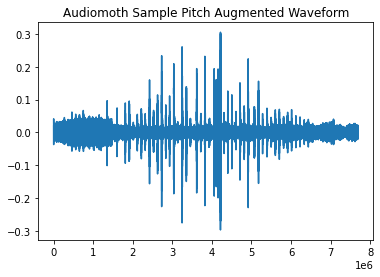

In [6]:
#This methodology was found in the medium article
#In practice we probably want a <1x and >1x pitch/tempo/speed copy
PITCH_FACTOR = round(np.random.uniform(low=.9,high=1.1),2)
print("Pitch Modulation Factor: ",PITCH_FACTOR )
PITCH_MODULATED_SIGNAL = librosa.effects.pitch_shift(SIGNAL,SAMPLE_RATE,PITCH_FACTOR)
plt.plot(PITCH_MODULATED_SIGNAL)
plt.title("Audiomoth Sample Pitch Augmented Waveform")
wavfile.write(AudioClip.split('.')[0] + "PitchAugmented." + AudioClip.split('.')[1],SAMPLE_RATE,PITCH_MODULATED_SIGNAL)

Text(0.5, 1.0, 'Audiomoth Sample Pitch Augmented Waveform')

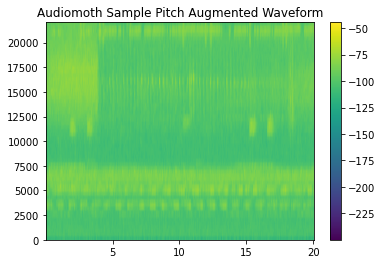

In [7]:
arr = plt.specgram(PITCH_MODULATED_SIGNAL,Fs = SAMPLE_RATE, NFFT = 1024, noverlap = 512, window = np.hanning(1024))
plt.ylim(0,22050)
plt.colorbar()
plt.title("Audiomoth Sample Pitch Augmented Waveform")

## White Noise Augmentation

In [8]:
def white_noise(data, noise_factor):
    noise = np.random.randn(len(data))
    augmented_data = data + noise_factor * noise
    # Cast back to same data type
    augmented_data = augmented_data.astype(type(data[0]))
    return augmented_data

Noise Modulation Factor:  0.007


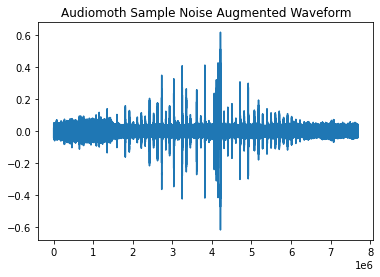

In [9]:
#The noise scalar I adjust based off of the amplitudes of the signal being passed in. More work has to be done here.
NOISE_FACTOR = round(np.random.uniform(low=.001,high=.02),3)
print("Noise Modulation Factor: ",NOISE_FACTOR)
NOISE_MODULATED_SIGNAL = white_noise(SIGNAL,NOISE_FACTOR)
plt.plot(NOISE_MODULATED_SIGNAL)
plt.title("Audiomoth Sample Noise Augmented Waveform")
wavfile.write(AudioClip.split('.')[0] + "NoiseAugmented." + AudioClip.split('.')[1],SAMPLE_RATE,PITCH_MODULATED_SIGNAL)

Text(0.5, 1.0, 'Audiomoth Sample Noise Augmented Spectrogram')

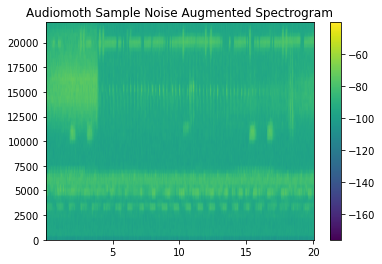

In [10]:
arr = plt.specgram(NOISE_MODULATED_SIGNAL,Fs = SAMPLE_RATE, NFFT = 1024, noverlap = 512, window = np.hanning(1024))
plt.ylim(0,22050)
plt.colorbar()
plt.title("Audiomoth Sample Noise Augmented Spectrogram")

## Guassian Noise Augmentation

In [24]:
def gaussian_noise(signal, factor):
    print("Gaussian noise")
    noise_modulated_signal = signal + np.random.normal(0, factor, signal.shape)
    noise_modulated_signal = noise_modulated_signal.astype(type(signal[0]))
    return noise_modulated_signal

Gaussian noise


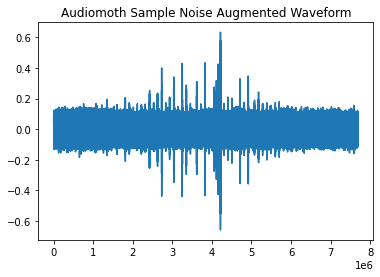

In [26]:
#The noise scalar I adjust based off of the amplitudes of the signal being passed in. More work has to be done here.
NOISE_MODULATED_SIGNAL = gaussian_noise(SIGNAL, 0.03)
plt.plot(NOISE_MODULATED_SIGNAL)
plt.title("Audiomoth Sample Noise Augmented Waveform")
wavfile.write(AudioClip.split('.')[0] + "NoiseAugmented." + AudioClip.split('.')[1],SAMPLE_RATE,PITCH_MODULATED_SIGNAL)

Text(0.5, 1.0, 'Audiomoth Sample Noise Augmented Spectrogram')

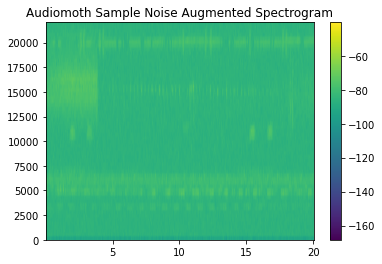

In [27]:
arr = plt.specgram(NOISE_MODULATED_SIGNAL,Fs = SAMPLE_RATE, NFFT = 1024, noverlap = 512, window = np.hanning(1024))
plt.ylim(0,22050)
plt.colorbar()
plt.title("Audiomoth Sample Noise Augmented Spectrogram")

## Colored Noise Augmentation

In [31]:
def colored_noise(signal, sample_rate, factor):
    print("Gaussian distributed noise with exponent: ", factor)
    noise = cn.powerlaw_psd_gaussian(factor, sample_rate)
    noise = np.tile(noise, int(len(signal) / len(noise)) + 1)
    noise = noise[:len(signal)]
    noise_modulated_signal = signal + noise
    noise_modulated_signal = noise_modulated_signal.astype(type(signal[0]))
    return noise_modulated_signal

Gaussian distributed noise with exponent:  1


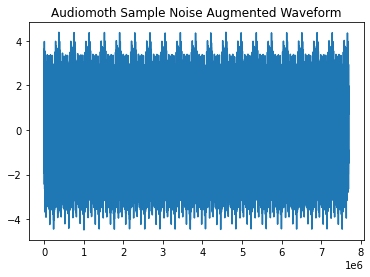

In [32]:
#The noise scalar I adjust based off of the amplitudes of the signal being passed in. More work has to be done here.
NOISE_MODULATED_SIGNAL = colored_noise(SIGNAL, 384000, 1)
plt.plot(NOISE_MODULATED_SIGNAL)
plt.title("Audiomoth Sample Noise Augmented Waveform")
wavfile.write(AudioClip.split('.')[0] + "NoiseAugmented." + AudioClip.split('.')[1],SAMPLE_RATE,PITCH_MODULATED_SIGNAL)

Text(0.5, 1.0, 'Audiomoth Sample Noise Augmented Spectrogram')

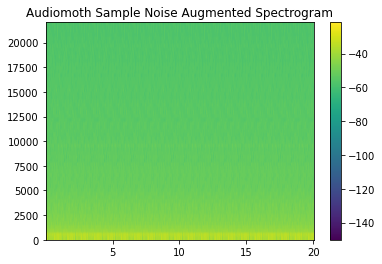

In [33]:
arr = plt.specgram(NOISE_MODULATED_SIGNAL,Fs = SAMPLE_RATE, NFFT = 1024, noverlap = 512, window = np.hanning(1024))
plt.ylim(0,22050)
plt.colorbar()
plt.title("Audiomoth Sample Noise Augmented Spectrogram")

## Speed Augmentation
There is overlap between this and Pitch Augmentation, since as you increase the speed, you increase the pitch.

Speed Modulation Factor:  1.07


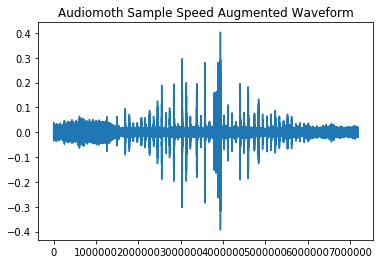

In [32]:
SPEED_FACTOR = round(np.random.uniform(low = 0.9, high = 1.1),2)
print("Speed Modulation Factor: ",SPEED_FACTOR)
SPEED_MODULATED_SIGNAL = librosa.effects.time_stretch(SIGNAL,SPEED_FACTOR)
plt.plot(SPEED_MODULATED_SIGNAL)
plt.title("Audiomoth Sample Speed Augmented Waveform")
wavfile.write(AudioClip.split('.')[0] + "SpeedAugmented." + AudioClip.split('.')[1],SAMPLE_RATE,SPEED_MODULATED_SIGNAL)

Text(0.5, 1.0, 'Audiomoth Sample Speed Augmented Spectrogram')

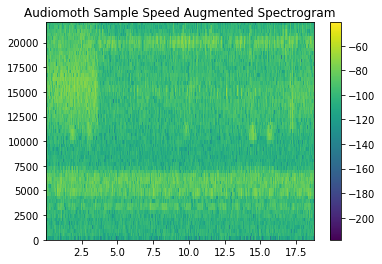

In [33]:
arr = plt.specgram(SPEED_MODULATED_SIGNAL,Fs = SAMPLE_RATE, NFFT = 1024, noverlap = 512, window = np.hanning(1024))
plt.ylim(0,22050)
plt.colorbar()
plt.title("Audiomoth Sample Speed Augmented Spectrogram")

## Tempo Augmentation

### Librosa doesn't seem to have a clean way to implement this, so I am using pySoX 
Unfortunately Pysox doesn't simply manipulate a numpy array as far as I can tell.

How to work with transformer class: 

https://pysox.readthedocs.io/en/latest/example.html

Tempo functionality that is implemented here:

https://pysox.readthedocs.io/en/latest/api.html#sox.transform.Transformer.tempo

In [37]:
TEMPO_FACTOR = round(np.random.uniform(low = 0.9, high = 1.1),2)
tempoTransformer = sox.Transformer()
tempoTransformer.tempo(TEMPO_FACTOR)
tempoTransformer.build(AudioClip,AudioClip.split('.')[0] + "TempoAugmented." + AudioClip.split('.')[1])

For this stretch factor, the stretch effect has better performance.
This install of SoX cannot process .wav files.
This install of SoX cannot process .wav files.
This install of SoX cannot process .wav files.


True

Tempo Modulation Factor:  1.02


Text(0.5, 1.0, 'Audiomoth Sample Tempo Augmented Waveform')

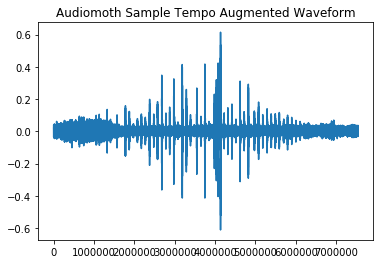

In [35]:
TEMPO_MODULATED_SIGNAL,SAMPLE_RATE = librosa.load(AudioClip.split('.')[0] + "TempoAugmented." + AudioClip.split('.')[1],sr=384000)
print("Tempo Modulation Factor: ",TEMPO_FACTOR)
plt.plot(TEMPO_MODULATED_SIGNAL)
plt.title("Audiomoth Sample Tempo Augmented Waveform")

Text(0.5, 1.0, 'Audiomoth Sample Tempo Augmented Spectrogram')

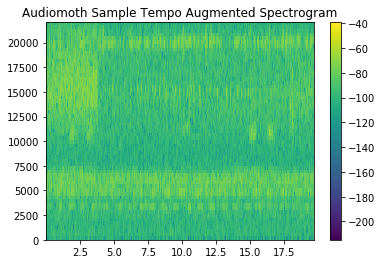

In [36]:
arr = plt.specgram(TEMPO_MODULATED_SIGNAL,Fs = SAMPLE_RATE, NFFT = 1024, noverlap = 512, window = np.hanning(1024))
plt.ylim(0,22050)
plt.colorbar()
plt.title("Audiomoth Sample Tempo Augmented Spectrogram")